# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [452]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [453]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
df.head()

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [454]:
# Calcula media, mediana y moda de la columna 'title_length'
mean = round(df['title_length'].mean(), 2)
print(f'The mean of the title length column values is {mean}')
median = df['title_length'].median()
print(f'The median of the title length column values is {median}')
mode = df['title_length'].mode()
if len(mode) == 1:
    print(f'The mode of the title length column values is {mode.iloc[0]}')
else:
    print(f'The modes of the title length column values are: {", ".join(map(str, mode.tolist()))}')

The mean of the title length column values is 15.48
The median of the title length column values is 14.0
The mode of the title length column values is 12


In [455]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
range_ = df['title_length'].max() - df['title_length'].min()
print(f'The range of the title length column values is {range_}')
variance = round(df['title_length'].var(), 2)
print(f'The variance of the title length column values is {variance}')
std = round(df['title_length'].std(), 2)
print(f'The standard deviation of the title length column values is {std}')


The range of the title length column values is 67
The variance of the title length column values is 72.11
The standard deviation of the title length column values is 8.49


In [456]:
# Calcula asimetría y curtosis de la columna 'title_length'
skewness = round(df['title_length'].skew(), 2) # Asimetría
print(f'The skewness of the title length column values is {skewness}')
kurtosis = round(df['title_length'].kurt(), 2) # Curtosis
print(f'The kurtosis of the title length column values is {kurtosis}')

The skewness of the title length column values is 1.53
The kurtosis of the title length column values is 3.81


In [457]:
# Imprime el título más corto y el título más largo según su longitud
shortest_title = df.loc[df['title_length'].idxmin()]['title']
print(f'The shortest title is: \'{shortest_title}\'')
longest_title = df.loc[df['title_length'].idxmax()]['title']
print(f'The longest title is: \'{longest_title}\'')

The shortest title is: 'M'
The longest title is: 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'


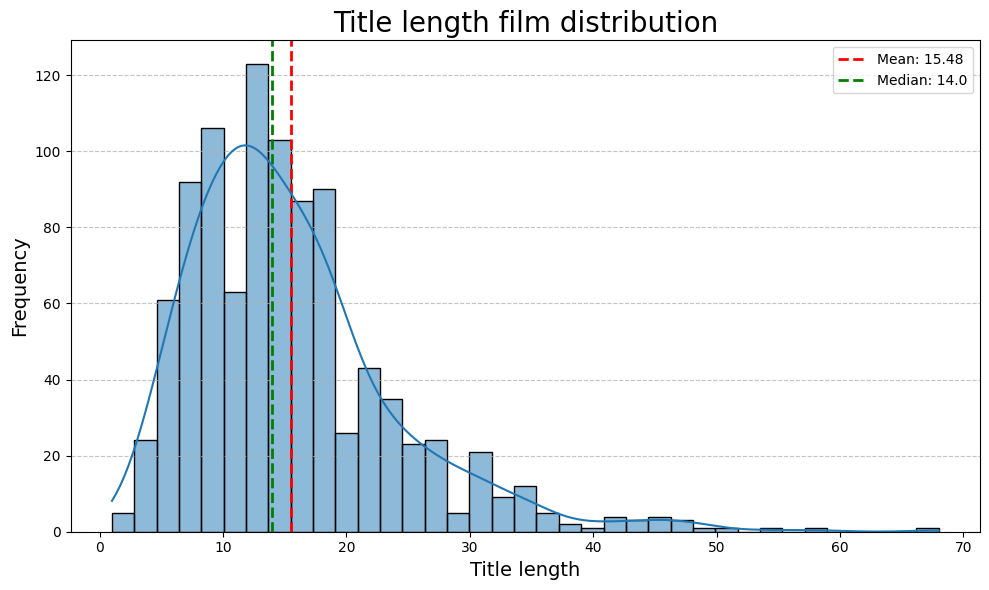

In [458]:
def plot_title_length(df):
    """
    Gráfica de la distribución de las longitudes de los títulos de las películas incluyendo la media, la mediana y 
    la curva de densidad extráida del parámetro kde
    """
    plt.figure(figsize=(10,6))
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    sns.histplot(data=df, x='title_length', kde=True)
    plt.title('Title length film distribution', fontsize=20)
    plt.xlabel('Title length', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.75)
    plt.tight_layout()
    plt.show()

plot_title_length(df)

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [459]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
data = df['title_length'].sample(5)
print('These are random data from the title_length column values')
data

These are random data from the title_length column values


726    15
28     22
370    22
939    14
507    10
Name: title_length, dtype: int64

In [460]:
# Calcula la media de los 5 valores
mean = round(sum(data) / len(data), 2)
print(f'The mean of these title length column 5 values is {mean}')

The mean of these title length column 5 values is 16.6


In [461]:
# Calcula las diferencias al cuadrado con respecto a la media
variance = round(sum((x - mean)**2 for x in data), 2)
print(f'The variance of these title length column 5 values is {variance}')

The variance of these title length column 5 values is 111.2


In [462]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
std = round(variance**2, 2)
print(f'The standard deviation of these title length column 5 values is {std}')

The standard deviation of these title length column 5 values is 12365.44
